In [16]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

x_points = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]
y_points = [106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46]

In [17]:
def divided_difference(x_points, y_points):
    if(len(x_points) == 1):
        return y_points[0]
    else:
        return (divided_difference(x_points[1 : ], y_points[1 : ]) - 
                divided_difference(x_points[ : -1],y_points[ : -1])) / (x_points[-1] - x_points[0])

def newton_poly(x_points, y_points, x):
    pol = 0
    product = 1
    for i in range(len(x_points)):
        pol += divided_difference(x_points[ : i + 1],y_points[ : i + 1]) * product
        product *= (x - x_points[i])
    return pol

In [18]:
def lagrange_interpolation(x_points, y_points, x):
    result = 0

    for i in range(len(x_points)):
        term = y_points[i]
        for j in range(len(x_points)):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return result

In [19]:
x_range = np.linspace(1920, 2000, 1000)
pol_L_values = [lagrange_interpolation(x_points, y_points, current) for current in x_range]
pol_N_values = [newton_poly(x_points, y_points, current) for current in x_range]


print(newton_poly(x_points,y_points, 1952), newton_poly(x_points,y_points, 1974), newton_poly(x_points,y_points, 2000))

157.72802626559996 213.51053127680007 175.08000000000226


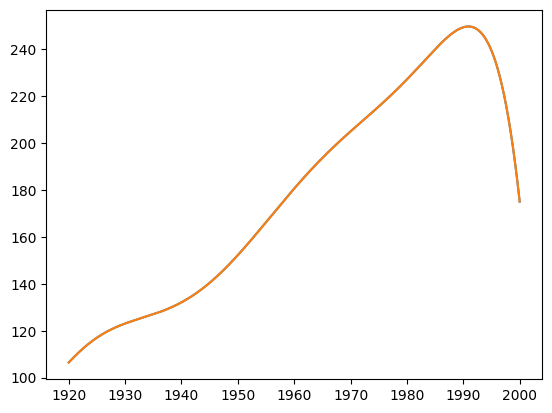

In [20]:
plt.plot(x_range, pol_L_values)
plt.plot(x_range, pol_N_values)
plt.show()